In [7]:
from emotion_recognition import EmotionRecognizer
from sklearn.svm import SVC
# init a model, let's use SVC
my_model = SVC()
# pass my model to EmotionRecognizer instance
# and balance the dataset
rec = EmotionRecognizer(model=my_model, emotions=['sad', 'neutral', 'happy'], balance=True, verbose=0)
# train the model
rec.train()
# check the test accuracy for that model
print("Test score:", rec.test_score())
# check the train accuracy for that model
print("Train score:", rec.train_score())

[+] Model trained
Test score: 0.6901408450704225
Train score: 0.7422729434141703


In [8]:
# loads the best estimators from `grid` folder that was searched by GridSearchCV in `grid_search.py`,
# and set the model to the best in terms of test score, and then train it
rec.determine_best_model(train=True)
# get the determined sklearn model name
print(rec.model.__class__.__name__," is the best")
# get the test accuracy score for the best estimator
print("Test score:", rec.test_score())

SVC  is the best
Test score: 0.8849765258215962


In [15]:
# this is a neutral speech from emo-db
print("Prediction:", rec.predict("data/emodb/wav/15a04Nc.wav"))
# this is a sad speech from TESS
print("Prediction:", rec.predict("C:/Users/Jincy Joy/Desktop/emotion-recognition-using-speech/data/radvess/Actor_06/03-02-03-02-02-01-06.wav"))

Prediction: neutral
Prediction: happy


In [36]:
from deep_emotion_recognition import DeepEmotionRecognizer
# initialize instance
# inherited from emotion_recognition.EmotionRecognizer
# default parameters (LSTM: 128x2, Dense:128x2)
deeprec = DeepEmotionRecognizer(emotions=['angry', 'sad', 'neutral', 'ps', 'happy'], n_rnn_layers=2, n_dense_layers=2, rnn_units=128, dense_units=128)
# train the model
deeprec.train()
# get the accuracy
print(deeprec.test_score())
# predict angry audio sample
prediction = deeprec.predict('C:/Users/Jincy Joy/Desktop/emotion-recognition-using-speech/data/radvess/Actor_06/03-02-03-02-02-01-06.wav')
print(f"Prediction: {prediction}")

[TESS&RAVDESS] There are 809 training audio files for category:angry
[TESS&RAVDESS] There are 148 testing audio files for category:angry
[TESS&RAVDESS] There are 813 training audio files for category:sad
[TESS&RAVDESS] There are 147 testing audio files for category:sad
[TESS&RAVDESS] There are 586 training audio files for category:neutral
[TESS&RAVDESS] There are 94 testing audio files for category:neutral
[TESS&RAVDESS] There are 514 training audio files for category:ps
[TESS&RAVDESS] There are 78 testing audio files for category:ps
[TESS&RAVDESS] There are 806 training audio files for category:happy
[TESS&RAVDESS] There are 148 testing audio files for category:happy
[+] Writed TESS & RAVDESS DB CSV File
[EMO-DB] Total files to write: 339
[EMO-DB] Training samples: 271
[EMO-DB] Testing samples: 67
[+] Writed EMO-DB CSV File
[Custom Dataset] There are 49 training audio files for category:neutral
[Custom Dataset] There are 33 testing audio files for category:neutral
[Custom Dataset] The

In [40]:
print(deeprec.predict_proba("data/emodb/wav/16a01Wb.wav"))

{'angry': 0.86932516, 'sad': 6.348722e-06, 'neutral': 5.696249e-05, 'ps': 0.12874661, 'happy': 0.0018648886}


In [41]:
print(deeprec.confusion_matrix(percentage=True, labeled=True))

              predicted_angry  predicted_sad  predicted_neutral  predicted_ps  \
true_angry          85.897430       2.564103           2.564103      3.846154   
true_sad            12.820514       2.564103           1.282051      6.410257   
true_neutral         6.410257      10.256411          79.487183      2.564103   
true_ps              5.128205       0.000000           2.564103     78.205124   
true_happy           8.974360      65.384613           5.128205     10.256411   

              predicted_happy  
true_angry           5.128205  
true_sad            76.923080  
true_neutral         1.282051  
true_ps             14.102565  
true_happy          10.256411  


[+] Model trained
[+] SVC with 1.0% (21) data samples achieved 93.818% Validation Score in 0.003s & 100.000% Test Score in 0.001s
[+] Model trained
[+] SVC with 10.0% (210) data samples achieved 93.818% Validation Score in 0.148s & 85.714% Test Score in 0.004s
[+] Model trained
[+] SVC with 100% (2103) data samples achieved 93.818% Validation Score in 5.779s & 88.498% Test Score in 1.119s

[+] Model trained
[+] RandomForestClassifier with 1.0% (21) data samples achieved 88.540% Validation Score in 0.529s & 50.000% Test Score in 0.011s
[+] Model trained
[+] RandomForestClassifier with 10.0% (210) data samples achieved 88.540% Validation Score in 1.547s & 73.810% Test Score in 0.011s
[+] Model trained
[+] RandomForestClassifier with 100% (2103) data samples achieved 88.540% Validation Score in 18.363s & 83.568% Test Score in 0.019s

[+] Model trained
[+] GradientBoostingClassifier with 1.0% (21) data samples achieved 94.769% Validation Score in 3.912s & 50.000% Test Score in 0.002s
[+] M

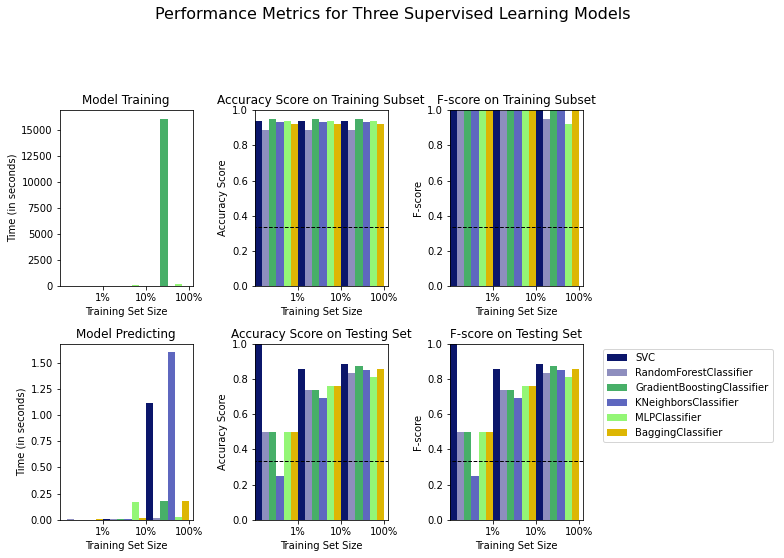

In [42]:
from emotion_recognition import plot_histograms
# plot histograms on different classifiers
plot_histograms(classifiers=True)